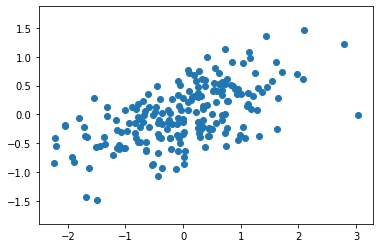

In [74]:
import torch
import matplotlib.pyplot as plt

z = torch.randn(200,2)

cov = torch.tensor(([1,0.2],[0.2,0.5]))

z = z @ cov

plt.scatter(z[:,0], z[:,1])
plt.axis("equal")
plt.show()

In [75]:
def findPC(z):
  dim = z.shape[1]
  w = torch.randn(dim)
    # w 크기가 1이 아니다:
  w = w/(w ** 2 ).sum() ** 0.5 # 길이
    
  lr = 0.1

  for epoch in range(101) : 
    w.requires_grad_(True)
    # variance 
    variance = ((z @ w.view(-1, 1))**2).mean()

    variance.backward()

    with torch.no_grad():
      w = w + lr * w.grad
      w = w/(w ** 2 ).sum() ** 0.5

      # print(f"epoch: {epoch}, w: {w}, var: {variance}")

  return w, variance.item()

In [76]:
def PCA(Z,n) :
  W = []
  V = []

  for _ in range(n) :
    w, v = findPC(Z)
    W.append(w)
    V.append(v)
    Z = Z - (Z @ w.view(-1, 1)) * w
  
  return W, V

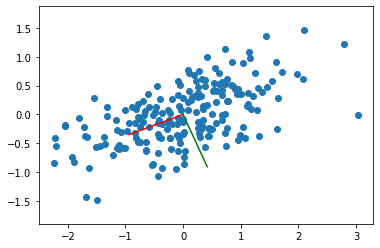

In [77]:
W, V = PCA(z,2)


plt.axis('equal')
plt.scatter(z[:,0], z[:,1])
plt.plot([0,W[0][0]],[0,W[0][1]], c = 'r')
plt.plot([0,W[1][0]],[0,W[1][1]], c = 'green')
plt.show()

In [78]:
def transform(Z, W) :
  return Z @ torch.stack(W).T

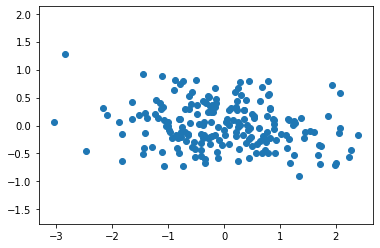

In [79]:
zt = z @ torch.stack(W).T

plt.scatter(zt[:,0], zt[:,1])
plt.axis('equal')
plt.show()

In [80]:
import requests

r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
with open("iris.data", "wb") as f:
  f.write(r.content)

vectors = []
answers = []

for line in open("iris.data", "r") :
  try :
    items = line.strip().split(",")
    vectors.append([float(i) for i in items[:4]])
    answers.append(items[4])
  except :
    pass

print(vectors)
print(answers)
species = {a: i for i, a in enumerate(set(answers))}
species

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

{'Iris-setosa': 2, 'Iris-versicolor': 0, 'Iris-virginica': 1}

In [81]:
X = torch.tensor(vectors)
Z = X - X.mean(dim = 0) # 각 축의 평균

In [82]:
W , V = PCA(Z, 4)
K = transform(Z,W)

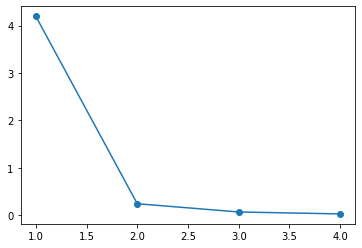

In [83]:
# scree plot

plt.plot(range(1,5), V, "-o")
plt.show()

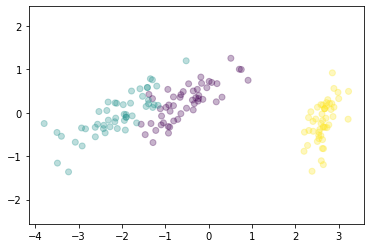

In [84]:
zt = transform(Z, W)


plt.scatter(zt[:,0], zt[:,1], c = [species[a] for a in answers],alpha = 0.3  )
plt.axis("equal")
plt.show()

# plt.scatter([0,1,2,3], [0,1,2,3], c = [1,2,3,4])
# plt.show()

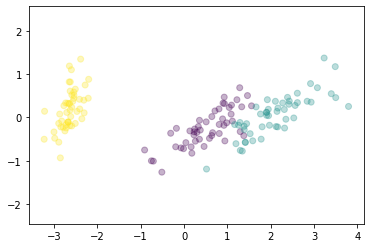

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Zt2 = pca.fit_transform(X)

plt.scatter(Zt2[:,0],Zt2[:,1], c = [species[a] for a in answers],alpha = 0.3)
plt.axis('equal')
plt.show()